# 웹 서비스에 데이터 베이스 연결하기

이전 챕터에서 유저의 요청에 따라서 마케팅 문구를 생성해주는 서비스를 만들어 보았습니다. 그런데 유저들이 어떤 요청을 보냈는지 저장을 하면 유용하게 쓸 수 있지 않을까요? 이를 위해선 데이터 베이스에 요청과 텍스트 생성 결과를 저장하면 좋을 것 같습니다.

이번 챕터에서는 무료로 사용할 수 있고, 직접 관리해야할 수고가 적은 Supabase라는 서비스를 이용해서 우리가 만든 웹 서비스에 데이터 베이스를 연동해보겠습니다.

## Supabase

Supabase는 쉽게 말하면 무료로 사용할 수 있고, 내가 직접 관리하지 않아도 되는 관계형 데이터 베이스를 제공해주는 서비스입니다. 사실 DB를 클라우드에 띄우고, 이를 관리하는 것은 생각보다 비용과 수고가 많이 들어가는 일입니다. Supabase는 이런 문제를 멋지게 해결해주어 많은 사랑을 받고있는 서비스입니다.

supabase: https://supabase.com/

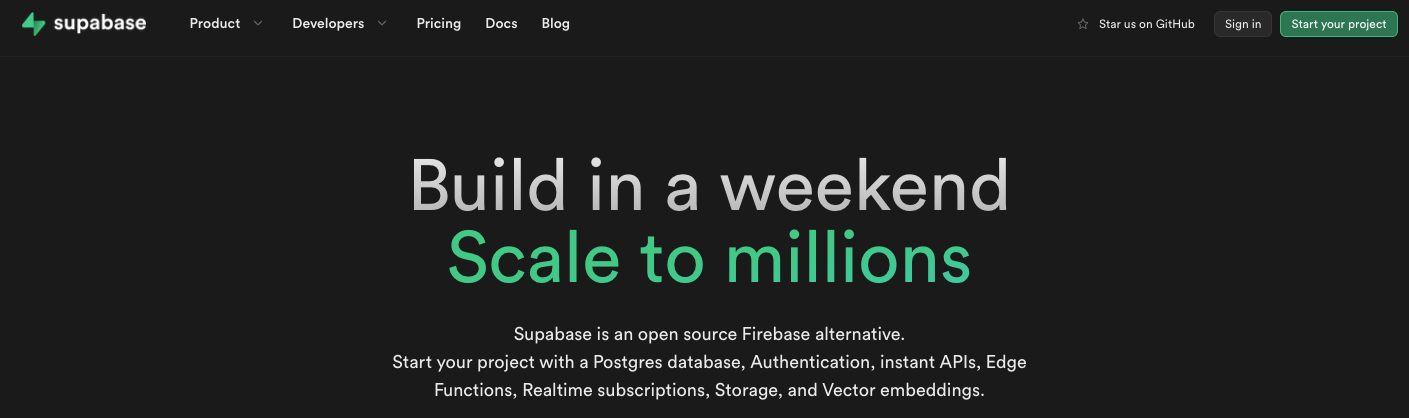

supabase에 회원가입을 한 뒤, 새 프로젝트를 생성해줍니다. region은 한국이고, 패스워드는 꼭 따로 기록해두세요. 비용은 0원 설정하면 됩니다.

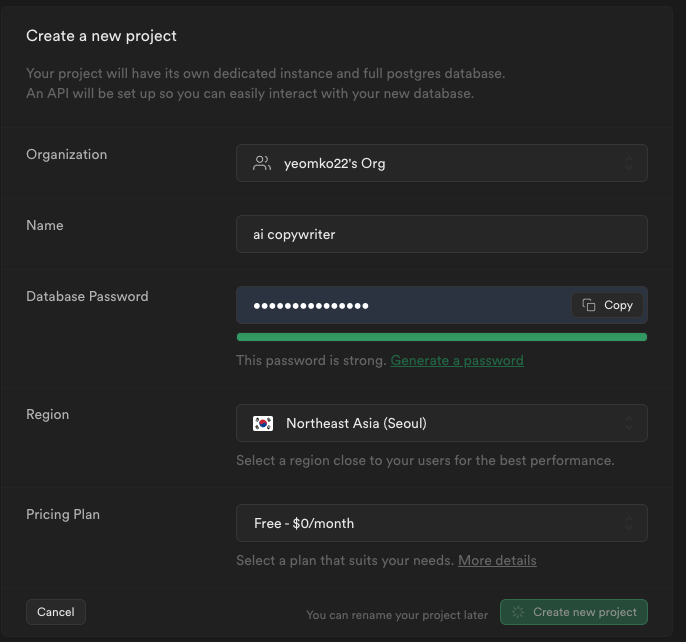

supabase console에서 간단하게 테이블을 생성할 수 있습니다. 이 때, RLS는 disable 해줍니다. RLS란 row level security의 약자로, 하나의 테이블 안에서도 행마다 서로 다른 보안 규칙을 적용할 수 있는 기능을 말합니다. 만일 로그인을 적용한 서비스라면 RLS를 세밀하게 설정해주어야 하지만, 이번 실습에서 개발하는 서비스에는 로그인이 적용되지 않으므로 disable 해줍니다. 

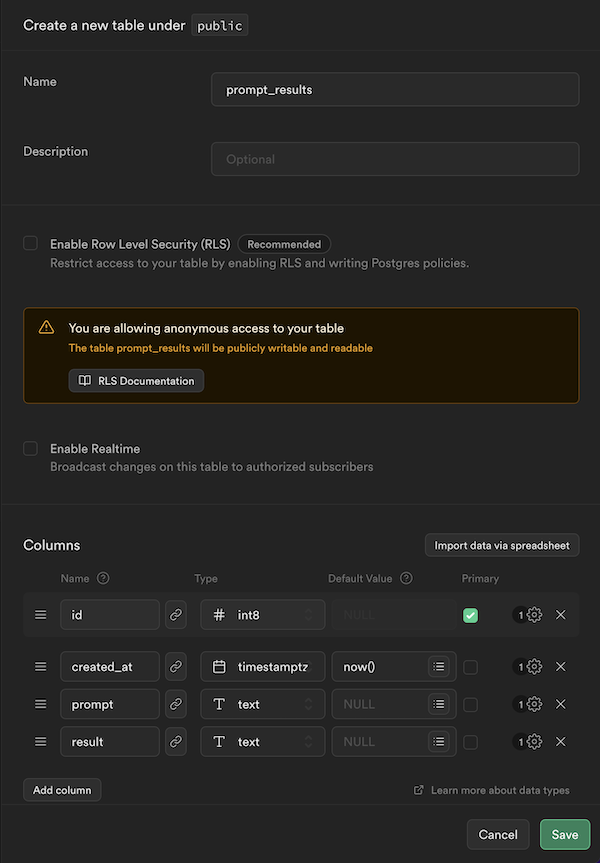

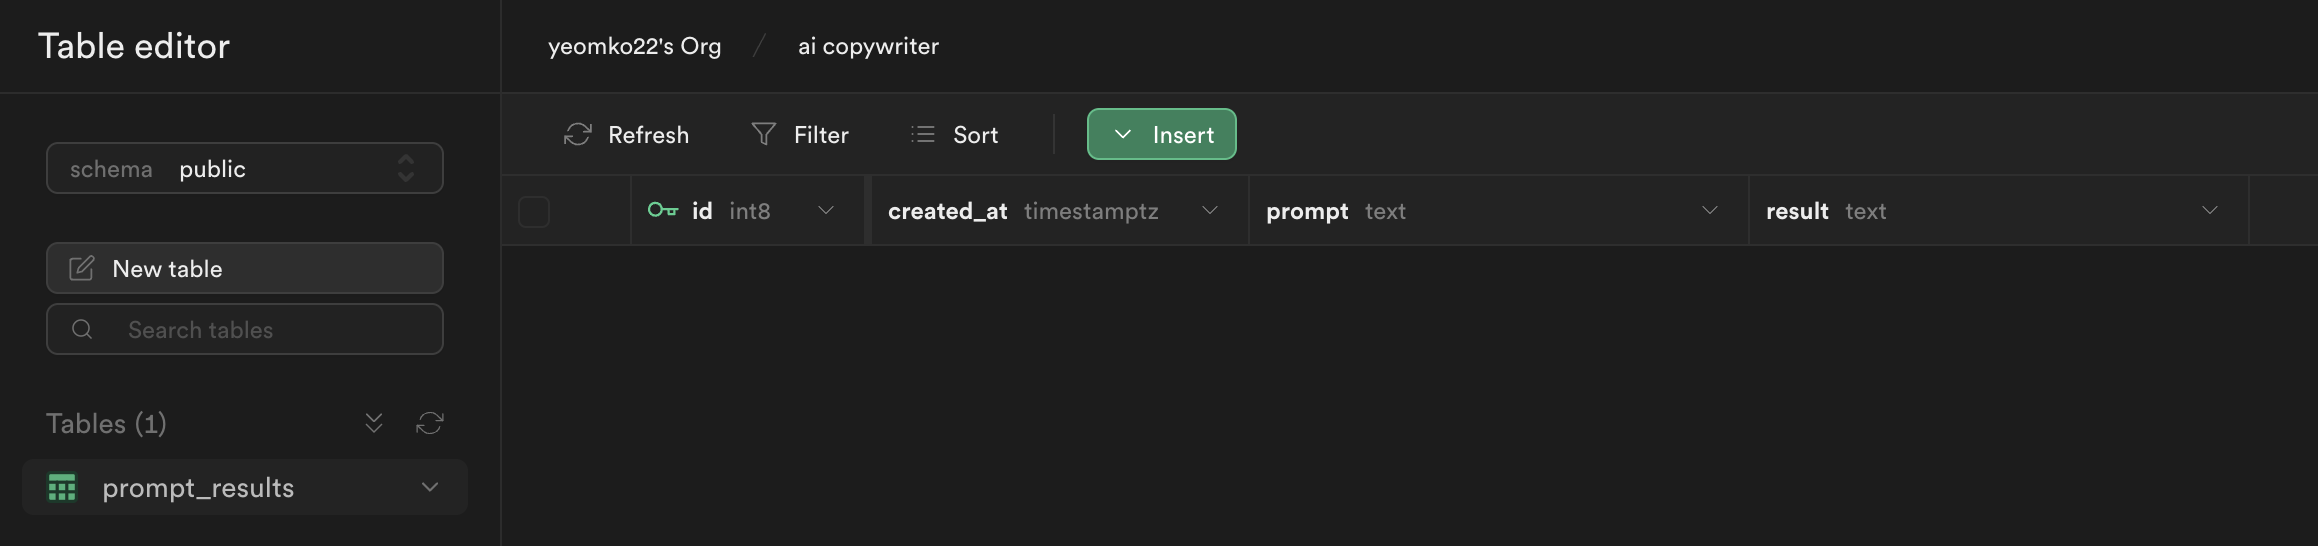

## python에서 supabase 연결하기

이제 Supabase를 통해서 만든 데이터 베이스가 클라우드 환경에 떴습니다. 파이썬 코드에서 데이터 베이스에 접근하여 데이터를 쓰고, 읽을 수 있습니다. 이 때, 마치 pymysql을 사용하여 mysql DB에 접속했던 것 처럼 supabase가 제공하는 client library를 사용하면 쉽게 구현할 수 있습니다.

supabase python client doc: https://supabase.com/docs/reference/python/introduction

먼저 Settings / API 탭에서 프로젝트 URL과 API KEY를 확인하여 환경 변수에 각각 SUPABASE_URL, SUPABASE_KEY라는 이름으로 추가해줍니다.

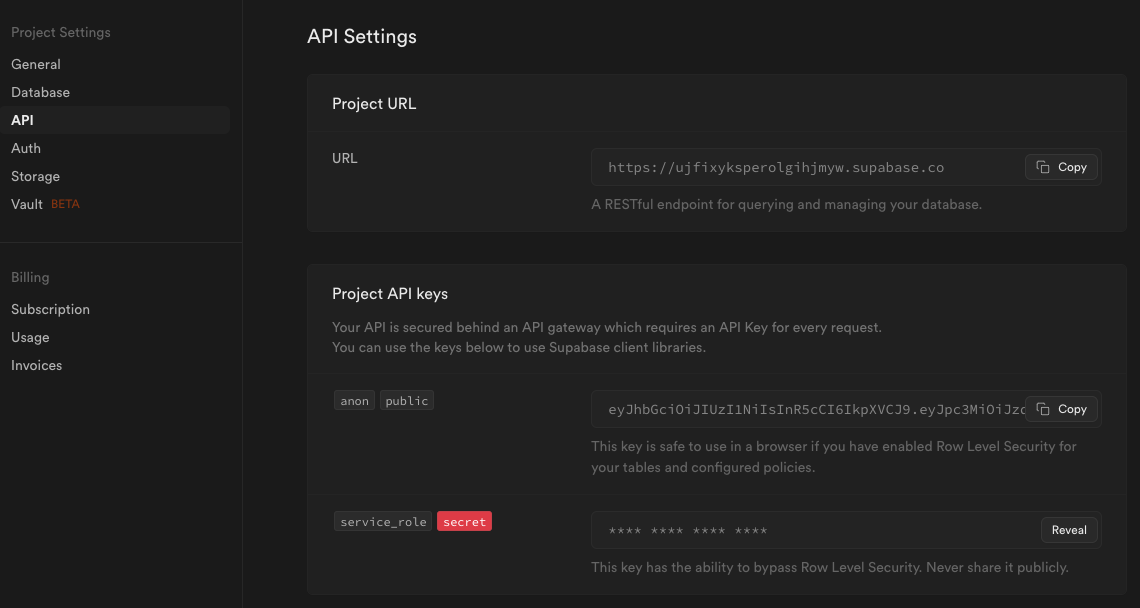

In [23]:
import os
from supabase import create_client, Client

url = os.environ.get("SUPABASE_URL")
key = os.environ.get("SUPABASE_KEY")
supabase: Client = create_client(url, key)

## supabase 데이터 조회하기

In [28]:
response = supabase.table("prompt_results").select("*").execute()

In [29]:
response.data

[{'id': 1,
  'created_at': '2023-06-22T15:24:22.722234+00:00',
  'prompt': '예시 프롬프트입니다.',
  'result': '예시 마케팅 문구입니다.'}]

## Supabase 데이터 쓰기

In [26]:
import json

prompt = "예시 프롬프트입니다."
result = "예시 마케팅 문구입니다."

In [27]:
data, count = supabase.table("prompt_results").insert({ "prompt": prompt, "result": result }).execute()

## 정리

이번 챕터에서는 serverless RDBMS 솔루션인 Supabase의 개념과 사용법에 대해서 알아보았습니다. 이제 이를 streamlit에서 연결해서 유저들이 어떤 요청을 보냈고, chatGPT가 어떤 텍스트를 생성했는지 supabase에 저장해보겠습니다.